In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset
survey_data = country_data = pd.read_csv('/home/homer/Desktop/Data Science/1_DataCamp/Data Science/7_Datacamp - Introduction to Data Visualization with Seaborn 2024-8/datasets/young-people-survey-responses.csv', index_col=0)
survey_data.head()

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [4]:
# Feature Engineering

#  Age Category
survey_data["Age Category"] = survey_data["Age"] < 21
survey_data["Age Category"] = survey_data["Age Category"].map({True: "Less than 21", False: "21+"})
#  High Internet User
survey_data["High Internet User"] = survey_data["Internet usage"].apply(lambda x: x in ["most of the day", "all day"])
#  Good Finances
survey_data["Good Finances"] = survey_data["Finances"] > 3
#  Rename Area column
survey_data.rename(columns={"Village - town": "Area"}, inplace=True)
#  Urban or Rural (boolean)
survey_data["Urban"] = survey_data["Area"] == "city"
#  Interested in Science (Math + History > 6)
survey_data["Interested in Science"] = (survey_data["Mathematics"] + survey_data["History"]) > 6


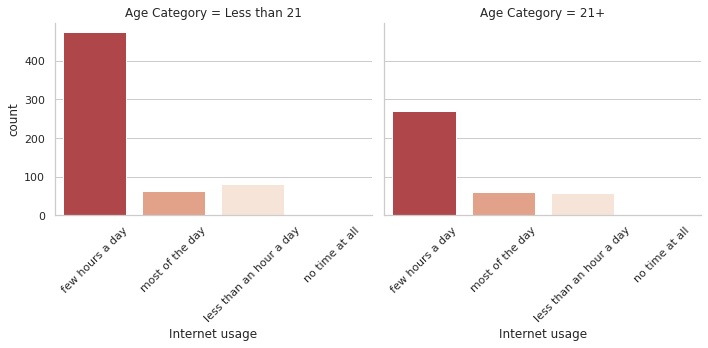

In [15]:
# Plot Internet usage by Age Category
sns.set_style('whitegrid')
sns.set_palette('RdBu')
g = sns.catplot(x='Internet usage',
                data=survey_data,
                kind='count',
                hue='Internet usage',
                col='Age Category')

g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.savefig('internet_usage_by_age.png')

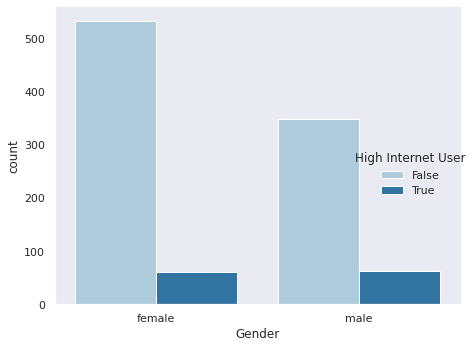

In [14]:
#  High Internet Usage by Gender
sns.set_style('dark')
sns.set_palette('Paired')
sns.set_context('notebook')
sns.catplot(x='Gender',
            hue='High Internet User',
            data=survey_data, kind='count')
plt.tight_layout()
plt.savefig('high_internet_user_by_gender.png')

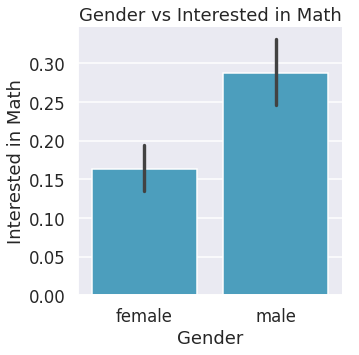

In [7]:

# Feature: Interested in Math (threshold > 3.0)
survey_data['Interested in Math'] = survey_data['Mathematics'] > 3.0

# Plot interest in math by gender
sns.set_palette(["#39A7D0", "#36ADA4"])
sns.set_style('darkgrid')
sns.set_context('talk')
sns.catplot(x='Gender', y='Interested in Math', data=survey_data, kind='bar')
plt.tight_layout()
plt.title('Gender vs Interested in Math')
plt.savefig('interest_in_math_by_gender.png')  
plt.show()

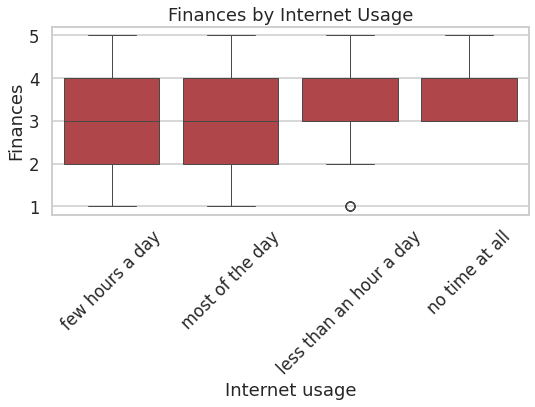

In [8]:
#  Finance Level vs Internet Usage
sns.set_style('whitegrid')
sns.set_palette('RdBu')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Internet usage', y='Finances',
            data=survey_data)
plt.xticks(rotation=45)
plt.title('Finances by Internet Usage')
plt.tight_layout()
plt.savefig('finances_vs_internet.png')

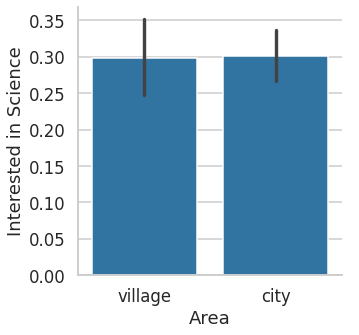

In [9]:
#  Interest in Science by Area
sns.set_color_codes(palette='deep')
sns.set_palette('tab10')
sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True)
sns.catplot(x='Area', y='Interested in Science',
            data=survey_data, kind='bar')
plt.tight_layout()
plt.savefig('interest_in_science_by_area.png')

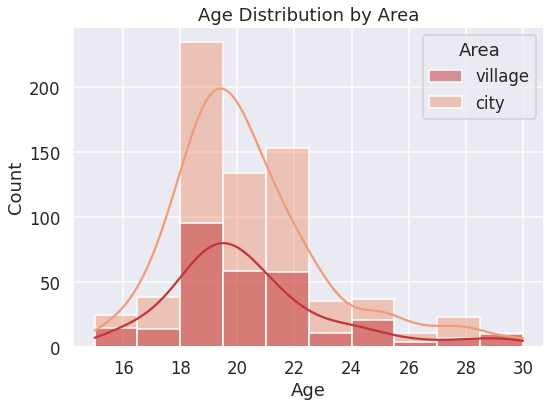

In [13]:
#  Age Distribution by Area
sns.set_style('darkgrid')
sns.set_palette('RdBu')
plt.figure(figsize=(8, 6))
sns.histplot(data=survey_data,
            x='Age',
            hue='Area',
            bins=10,
            kde=True)
plt.title("Age Distribution by Area")
plt.tight_layout()
plt.savefig('age_distribution_by_area.png')

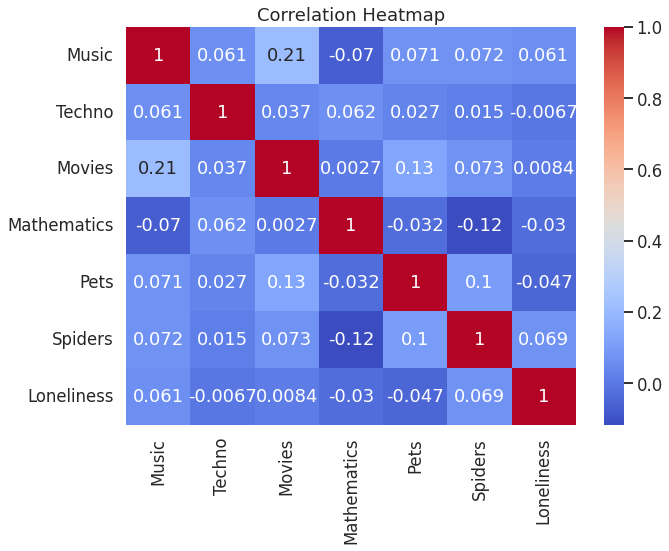

In [11]:

#  Correlation Heatmap (for numeric survey data)
sns.set_palette('Paired')
plt.figure(figsize=(10, 8))
corr_matrix = survey_data[["Music", "Techno", "Movies", "Mathematics", "Pets", "Spiders", "Loneliness"]].corr()
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('survey_correlation_heatmap.png')